In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from elo import Elo
from glicko import Glicko
from glicko2 import Glicko2
import numpy as np
from func import prob_log
from func import old_prob_log
import matplotlib.pyplot as plt
import time

In [ ]:
# Initializing Simulations

num_players = 1000
init_rating = np.full(num_players, 1500, dtype=np.float32)
init_true_rating = np.random.normal(1500, 350, num_players).astype(np.float32)
# init_true_rating = np.random.uniform(1000, 2000, num_players).astype(np.float32)
# init_true_rating = np.full(num_players, 1500, dtype=np.float32)
rating_const = 20
init_rd = np.full(num_players, 350, dtype=np.float32)
init_vol = np.full(num_players, 0.06, dtype=np.float32)
vol_const = 0.6

elo = Elo(num_players, init_rating, init_true_rating, rating_const)
glicko = Glicko(num_players, init_rating, init_true_rating, init_rd)
glicko2 = Glicko2(num_players, init_rating, init_true_rating, init_rd, init_vol, vol_const)

In [11]:
# Simulate Matches and Data Collection

num_games = 2000
period_size = 10

agg_abs_diff_elo = [np.mean(np.abs(elo.true_ratings - elo.ratings))]
agg_sq_diff_elo = [np.mean(np.square(elo.true_ratings - elo.ratings))]

agg_abs_diff_glicko = [np.mean(np.abs(glicko.true_ratings - glicko.ratings))]
agg_sq_diff_glicko = [np.mean(np.square(glicko.true_ratings - glicko.ratings))]

agg_abs_diff_glicko2 = [np.mean(np.abs(glicko2.true_ratings - glicko2.ratings))]
agg_sq_diff_glicko2 = [np.mean(np.square(glicko2.true_ratings - glicko2.ratings))]

# for i in range(num_players):
#     if elo.true_ratings[i] < 800:
#         target = i
#         break

# print(elo.true_ratings[0])


start_time = time.time()
for i in range(num_games):
    
    # elo.match_all_perfect()
    # if (i+1) % period_size == 0:
    #     glicko.match_all_perfect(period_size)
    #     glicko2.match_all_perfect(period_size)
    
    elo.match_all_random()
    if (i+1) % period_size == 0:
        glicko.match_all_random(period_size)
        glicko2.match_all_random(period_size)

    # elo.match_all_realistic()
    # if (i+1) % period_size == 0:
    #     glicko.match_all_realistic(period_size)
    #     glicko2.match_all_realistic(period_size)
    
    agg_abs_diff_elo.append(np.mean(np.abs(elo.true_ratings - elo.ratings)))
    agg_sq_diff_elo.append(np.mean(np.square(elo.true_ratings - elo.ratings)))
    agg_abs_diff_glicko.append(np.mean(np.abs(glicko.true_ratings - glicko.ratings)))
    agg_sq_diff_glicko.append(np.mean(np.square(glicko.true_ratings - glicko.ratings)))
    agg_abs_diff_glicko2.append(np.mean(np.abs(glicko2.true_ratings - glicko2.ratings)))
    agg_sq_diff_glicko2.append(np.mean(np.square(glicko2.true_ratings - glicko2.ratings)))
print("--- %s seconds ---" % (time.time() - start_time))


# print(agg_abs_diff)
# print(agg_sq_diff)

KeyboardInterrupt: 

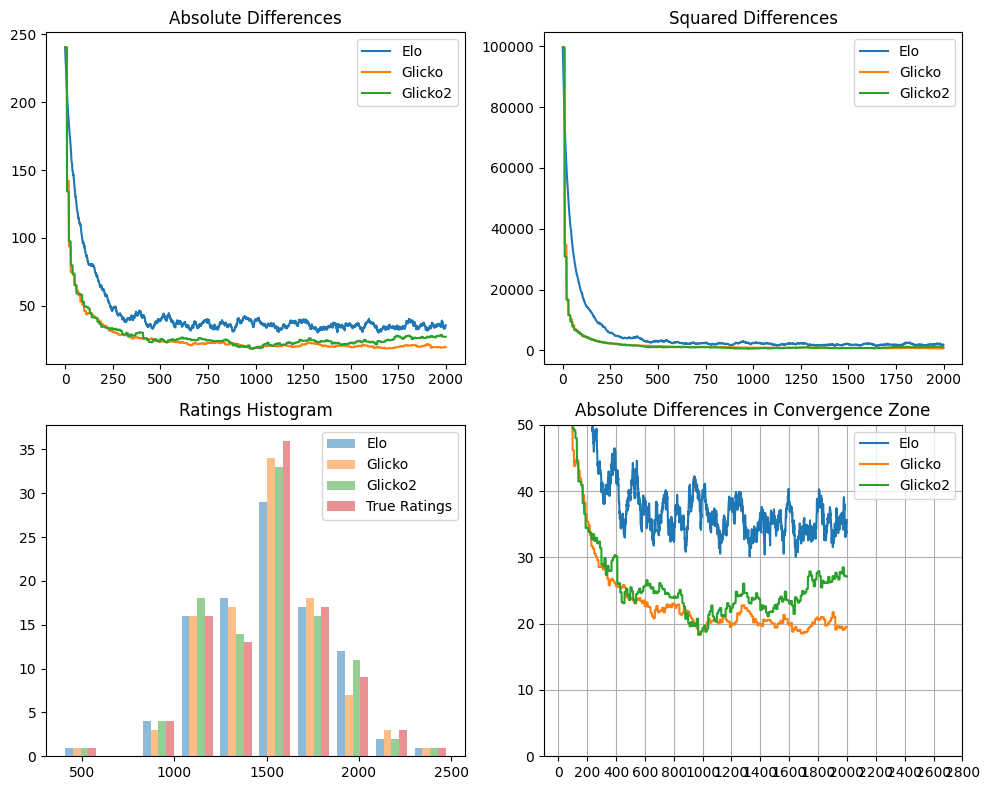

In [ ]:
# Plotting

x = np.arange(num_games+1)
a, b = 0, num_games
window = slice(a,b)
target = 50

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Top-left: Absolute differences
axs[0, 0].plot(x[window], agg_abs_diff_elo[window], label="Elo")
axs[0, 0].plot(x[window], agg_abs_diff_glicko[window], label="Glicko")
axs[0, 0].plot(x[window], agg_abs_diff_glicko2[window], label="Glicko2")
axs[0, 0].set_title("Absolute Differences")
axs[0, 0].legend()

# Top-right: Squared differences
axs[0, 1].plot(x[window], agg_sq_diff_elo[window], label="Elo")
axs[0, 1].plot(x[window], agg_sq_diff_glicko[window], label="Glicko")
axs[0, 1].plot(x[window], agg_sq_diff_glicko2[window], label="Glicko2")
axs[0, 1].set_title("Squared Differences")
axs[0, 1].legend()

# Bottom-left: Histogram of all ratings and true ratings
axs[1, 0].hist([elo.ratings, glicko.ratings, glicko2.ratings, elo.true_ratings], bins=10, alpha=0.5, 
               label=["Elo", "Glicko", "Glicko2", "True Ratings"])
axs[1, 0].set_title("Ratings Histogram")
axs[1, 0].legend()

# Bottom-right: Absolute Differences in convergence zone
axs[1, 1].plot(x[window], agg_abs_diff_elo[window], label="Elo")
axs[1, 1].plot(x[window], agg_abs_diff_glicko[window], label="Glicko")
axs[1, 1].plot(x[window], agg_abs_diff_glicko2[window], label="Glicko2")
axs[1, 1].set_title("Absolute Differences in Convergence Zone")
axs[1, 1].set_ylim(0, target)
axs[1, 1].set_xticks(range(0, 3000, 200))
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
elo_target = np.argmax(np.array(agg_abs_diff_elo) <= target)
glicko_target = np.argmax(np.array(agg_abs_diff_glicko) <= target)
glicko2_target = np.argmax(np.array(agg_abs_diff_glicko2) <= target)

print(elo_target)
print(glicko_target)
print(glicko2_target)

237
100
100


In [ ]:
glicko.print_data()

 ID     Rating    True Rating  Rating Deviation
0      896.40     907.48       30.00      
1      1895.29    1895.87      30.00      
2      1194.74    1219.24      30.00      
3      1543.85    1514.47      30.00      
4      1095.89    1110.97      30.00      
5      1413.22    1430.27      30.00      
6      1695.05    1728.26      30.00      
7      1161.90    1158.17      30.00      
8      1162.29    1183.87      30.00      
9      1607.15    1588.33      30.00      
10     1653.91    1670.53      30.00      
11     1454.90    1470.43      30.00      
12     1532.65    1535.68      30.00      
13     1049.38    1101.12      30.00      
14     1551.71    1576.61      30.00      
15     1536.23    1543.49      30.00      
16     1844.52    1833.62      30.00      
17     1810.12    1832.37      30.00      
18     1679.78    1690.15      30.00      
19     1467.62    1459.19      30.00      
20     1520.78    1540.55      30.00      
21     1279.75    1271.61      30.00      
22    